In [1]:
import pandas as pd
import seaborn as sns

In [2]:
bc = pd.read_csv('../data/raw/satellite_data/blackCarbon_India.csv')
bc = bc.melt(id_vars=['date'], value_vars=bc.columns[2:])
bc['date'] = pd.to_datetime(bc['date'])
bc.columns = ['date', 'location', 'BC_sat']

co = pd.read_csv('../data/raw/satellite_data/CO_India.csv', na_values=[-9999])
co = co.melt(id_vars=['date'], value_vars=co.columns[2:])
co['date'] = pd.to_datetime(co['date'])
co.columns = ['date', 'location', 'CO_sat']

no2 = pd.read_csv('../data/raw/satellite_data/NO2_India.csv', na_values=['-1.27E+30'])
no2 = no2.melt(id_vars=['date'], value_vars=no2.columns[2:])
no2['date'] = pd.to_datetime(no2['date'])
no2.columns = ['date', 'location', 'NO2_sat']

so2 = pd.read_csv('../data/raw/satellite_data/SO2_India.csv', na_values=['-1.27E+30'])
so2 = so2.melt(id_vars=['date'], value_vars=so2.columns[2:])
so2['date'] = pd.to_datetime(so2['date'])
so2.columns = ['date', 'location', 'SO2_sat']

<AxesSubplot:ylabel='date-location'>

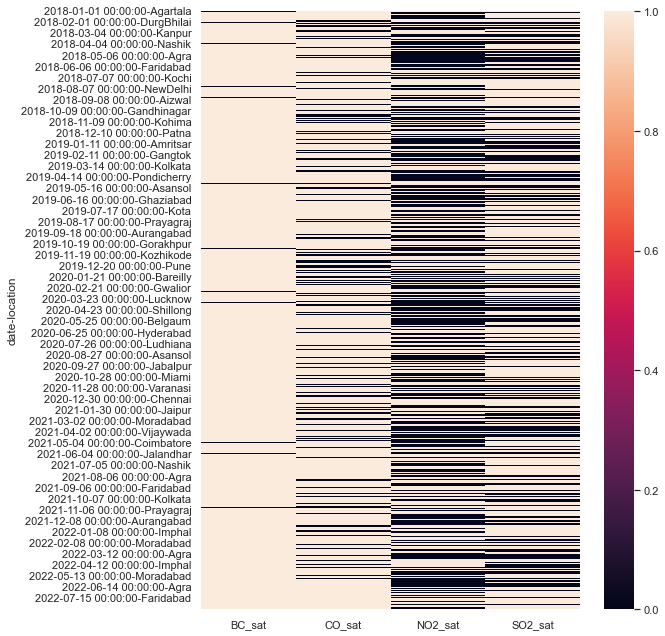

In [3]:
sat_all = bc\
    .merge(co, how='outer', on=['date', 'location'])\
    .merge(no2, how='outer', on=['date', 'location'])\
    .merge(so2, how='outer', on=['date', 'location'])

sat_all = sat_all.sort_values(['date', 'location']).set_index(['date', 'location'])
sat_all = sat_all.loc['2018-01-01': '2022-12-31']
sns.set(rc={'figure.figsize':(8.5,11)})
sns.heatmap(sat_all.isna())

In [5]:
sat_all = sat_all.astype('float64')
sat_all.to_csv('../data/cleaned/satellite.csv')
sat_all.to_pickle('../data/cleaned/satellite.pkl')
sat_all

BC_sat  CO_sat       NO2_sat  SO2_sat
date       location                                                       
2018-01-01 Agartala            8.280000e-09     NaN           NaN      NaN
           Agra                6.130000e-09     NaN           NaN      NaN
           Aizwal              2.410000e-09     NaN           NaN      NaN
           Amritsar            5.420000e-09     NaN           NaN      NaN
           Asansol             9.150000e-09     NaN  8.450960e+15     0.53
...                                     ...     ...           ...      ...
2022-08-14 Srinagar                     NaN     NaN  3.348100e+15      NaN
           Thiruvananthapuram           NaN     NaN  2.807850e+15      NaN
           Varanasi                     NaN     NaN  6.497650e+15      NaN
           Vijaywada                    NaN     NaN           NaN      NaN
           Visakhapatnam                NaN     NaN           NaN      NaN

[92776 rows x 4 columns]